In [1]:
print(1)   # conda install ipykernel i w normalnym vscode działa rozszerzenie po jakimś przeładowaniu jeśli się wybierze ten pyton interpreter

1


In [2]:
import matplotlib.pyplot as plt

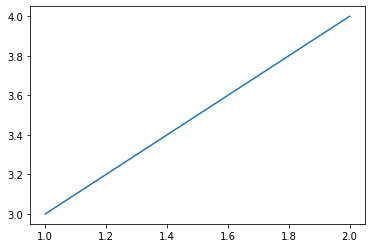

In [4]:
plt.plot([1,2],[3,4])

In [1]:
import torch

t = torch.zeros(1).cuda()
print(t.mean())

tensor(0., device='cuda:0')


In [2]:
import argparse
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
#import scipy.spatial.distance

import cpc.feature_loader as fl
import cpc.train as tr
from cpc.dataset import AudioBatchData, findAllSeqs, filterSeqs, parseSeqLabels




In [5]:

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2-12v3cpcctc-0to50/checkp/checkpoint_50.pt"

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2fixed-12cpcctcSimpleOnlyteachlast-0to50/checkp/checkpoint_50.pt"

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2fixed-12cpcctcSimpleExp1StdevgradreweightedMasklengthsforlinsepDontshrinkenc-0to50/checkp/checkpoint_50.pt"

CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred5-Doubleexp1Len03to07-0to50/checkp/checkpoint_50.pt"


In [7]:

cdata = fl.getCheckpointData(os.path.dirname(CP))
_, _, args, _ = cdata
#args.pathDB = '/pio/data/zerospeech2021/LibriSpeech-wav/train-clean-100'
#args.pathTrain = '/pio/scratch/2/jch/wav2vec/LibriSpeech100_labels_split/train_split.txt'
#args.pathVal = '/pio/scratch/2/jch/wav2vec/LibriSpeech100_labels_split/test_split.txt'
#args.pathPhone = '/pio/scratch/2/jch/wav2vec/LibriSpeech100_labels_split/converted_aligned_phones.txt'
args.size_window = 20480
args.modelLengthInARsimple = True
#print(args.__dict__)
print("args:", "\n".join([str(a)+": "+str(args.__dict__[a]) for a in sorted(args.__dict__)]))

seqNames, speakers = findAllSeqs(args.pathDB,
                                 extension=args.file_extension,
                                 loadCache=not args.ignore_cache)
phone_labels, n_phones = parseSeqLabels(args.path_phone_data)

seq_val = filterSeqs(args.pathVal, seqNames)[:10]
db_val = AudioBatchData(args.pathDB, args.size_window, seq_val,
                        (phone_labels, n_phones), len(speakers))

if args.FCMsettings:
    if args.modelLengthInARpredStartDep or args.modelLengthInARpredEndDep:
        modelLengthInARpredDep = args.nPredicts
    else:
        modelLengthInARpredDep = None
    fcmSettings = {
        "numProtos": args.FCMprotos, 
        "pushLossWeightEnc": args.FCMpushLossWeightEnc,
        "pushLossWeightCtx": args.FCMpushLossWeightCtx,
        "VQpushEncCenterWeightOnTopConv": args.FCMVQpushEncCenterWeightOnTopConv,
        "VQpushEncCenterWeightOnlyAR": args.FCMVQpushEncCenterWeightOnlyAR,
        "VQpushEncCenterWeightOnlyCriterion": args.FCMVQpushEncCenterWeightOnlyCriterion,
        "VQgradualStart": args.FCMVQgradualStart,
        "VQpushCtxCenterWeight": args.FCMVQpushCtxCenterWeight,
        "pushLossLinear": args.FCMpushLossLinear,
        "pushLossGradualStart": args.FCMpushLossGradualStart,
        "pushLossProtosMult": args.FCMpushLossProtosMult,
        "pushLossCenterNorm": args.FCMpushLossCenterNorm,
        "pushLossPointNorm": args.FCMpushLossPointNorm,
        "pushLossNormReweight": args.FCMpushLossNormReweight,
        "hierARshorten": args.FCMhierARshorten,
        "hierARgradualStart": args.FCMhierARgradualStart,
        "hierARmergePrior": args.FCMhierARmergePrior,
        "modelLengthInARsimple": args.modelLengthInARsimple,
        "modelLengthInARpredDep": modelLengthInARpredDep,
        "showLengthsInCtx": args.linsepShowARlengthsInCtx,
        "shrinkEncodingsLengthDims": args.shrinkEncodingsLengthDims
    }
else:
    fcmSettings = None

cpcModel, args.hiddenGar, args.hiddenEncoder = fl.loadModel([CP], args.batchSizeGPU, fcmSettings=fcmSettings)
assert args.speakerEmbedding == 0
CPChiddenGar, CPChiddenEncoder = args.hiddenGar, args.hiddenEncoder


cpcCriterion = tr.loadCriterion(CP, cpcModel.gEncoder.DOWNSAMPLING, len(speakers), n_phones)



cpcCriterion.cuda()
cpcModel.cuda()










args: ARinputDim: 256
ARlengthFirstPredID: False
ARlengthPredNoise: None
ARlengthsGradReweight: None
ARmap01rangeMax: 0.7
ARmap01rangeMin: 0.3
ARmodelFrameNormalsDistMult: None
ARmodelFrameNormalsSigma: None
ARteachLongPredsSqrtLess: False
ARteachLongPredsUniformlyLess: False
ARteachOnlyLastFrameLength: False
CPCCTC: True
CPCCTCLearnBlank: False
CPCCTCLossTemp: 1.0
CPCCTCMasq: 
CPCCTCNoNegsMatchWin: False
CPCCTCNormalizeEncs: False
CPCCTCNormalizePreds: False
CPCCTCNumMatched: 12
CPCCTCSelfLoop: False
CPCCTCSkipBeg: 0
CPCCTCSkipEnd: 0
CTC: False
CTCphones: False
FCMVQgradualStart: None
FCMVQpushCtxCenterWeight: None
FCMVQpushEncCenterWeightOnTopConv: None
FCMVQpushEncCenterWeightOnlyAR: None
FCMVQpushEncCenterWeightOnlyCriterion: None
FCMcenter_batchRecompute: None
FCMcenter_firstInitNoIters: False
FCMcenter_initAfterEpoch: None
FCMcenter_kmeansInitBatches: None
FCMcenter_kmeansInitIters: None
FCMcenter_kmeansReinitEachN: None
FCMcenter_kmeansReinitUpTo: None
FCMcenter_mode: None
FCMce

CPCModel(
  (gEncoder): CPCEncoder(
    (conv0): Conv1d(1, 256, kernel_size=(10,), stride=(5,), padding=(3,))
    (batchNorm0): ChannelNorm()
    (conv1): Conv1d(256, 256, kernel_size=(8,), stride=(4,), padding=(2,))
    (batchNorm1): ChannelNorm()
    (conv2): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm2): ChannelNorm()
    (conv3): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm3): ChannelNorm()
    (conv4): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm4): ChannelNorm()
  )
  (gAR): CPCAR(
    (baseNet): LSTM(256, 256, num_layers=2, batch_first=True)
  )
)

In [8]:
val_loader = db_val.getDataLoader(16, 'sequential', False, numWorkers=0)  # 8
data_iter = iter(val_loader)
batchData, labelData = next(data_iter)
label = labelData['speaker'].cuda()
labelPhone = labelData['phone'].cuda()
batchData = batchData.cuda()
c_feature, predLengths, encoded_data, pure_enc, label, labelPhoneByGPU, pushLoss, segmSetTens, _, _ = \
    cpcModel(batchData, label, labelPhone, None, None, (50,50), False, False)
            



torch.Size([16, 1, 20480]) torch.Size([16, 128, 256])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 29, 29,
        29, 29], device='cuda:0')
tensor([-0.4270, -0.7937,  0.4485, -0.4751, -0.3009, -0.3659, -0.8238, -0.9344,
         0.0171,  0.7173,  0.9512,  0.9865,  0.7854, -0.7544, -0.9611, -0.9934,
        -0.9991, -0.7693,  0.6679,  0.8442,  0.9679,  0.9939,  0.9992,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000,  0.9673, -0.6932, -0.9416, -0.9912,
        -0.9986, -0.9997, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -0.9975, -0.8912,  0.2635, -0.6984, -0.0560, -0.0939,  0.2320,  0.4780,
         0.7663,  0.9380,  0.9906,  0.9987,  0.9998,  1.0000,  1.0000,  0.8976,
        -0.3986,  0.7497,  0.9379,  0.9362,  0.7304,  0.0417,  0.5906, -0.3074,
        -0.3287, -0.7396, -0.9337, -0.9891, -0.9983, -0.9997, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -0.5198,  0.7471,  0.960

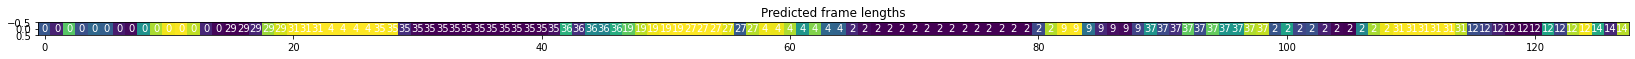

0: min 0.2689414322376251, max 0.7310582399368286
[(37, '0.52'), (37, '0.68'), (37, '0.70'), (37, '0.64'), (37, '0.58'), (37, '0.63'), (6, '0.33'), (6, '0.28'), (6, '0.27'), (6, '0.27'), (6, '0.28'), (6, '0.67'), (6, '0.34'), (6, '0.28'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (39, '0.40'), (39, '0.62'), (39, '0.40'), (39, '0.68'), (39, '0.72'), (39, '0.73'), (39, '0.73'), (39, '0.73'), (6, '0.73'), (6, '0.73'), (6, '0.32'), (6, '0.50'), (6, '0.65'), (6, '0.37'), (6, '0.45'), (37, '0.62'), (37, '0.65'), (37, '0.67'), (37, '0.65'), (37, '0.67'), (27, '0.36'), (27, '0.57'), (27, '0.68'), (27, '0.72'), (4, '0.73'), (4, '0.67'), (4, '0.35'), (4, '0.58'), (4, '0.58'), (4, '0.35'), (2, '0.30'), (2, '0.31'), (2, '0.36'), (2, '0.47'), (2, '0.39'), (2, '0.68'), (31, '0.68'), (31, '0.69'), (31, '0.72'), (31, '0.73'),

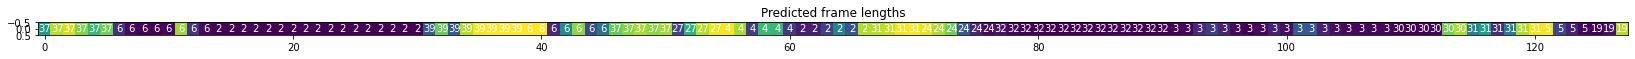

1: min 0.2689414322376251, max 0.731053352355957
[(3, '0.60'), (3, '0.36'), (3, '0.33'), (3, '0.29'), (3, '0.68'), (3, '0.72'), (27, '0.73'), (27, '0.73'), (27, '0.33'), (27, '0.29'), (27, '0.27'), (27, '0.32'), (27, '0.61'), (27, '0.33'), (27, '0.48'), (27, '0.51'), (4, '0.66'), (4, '0.61'), (4, '0.68'), (4, '0.72'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (0, '0.73'), (0, '0.73'), (0, '0.73'), (0, '0.73'), (0, '0.68'), (0, '0.34'), (0, '0.29'), (0, '0.28'), (0, '0.27'), (0, '0.28'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.35'), (0, '0.46'), (0, '0.68'), (0, '0.61'), (0, '0.68'), (0, '0.72'), (0, '0.73'), (0, '0.73'), (35, '0.72'), (35, '0.32'), (35, '0.49'), (35, '0.68'), (35, '0.72'), (35, '0.58'), (35, '0.42'), (35, '0.33'), (35, '0.36'), (35, '0.66'), (35, '0.35'), (35, '0.33'), (36, '0.61'), (36, '0.35'), (36, '0.34'), (36, '0.56'), (19, '0.55'), (19, '0.46'), (19, '0.34'), (19, '0.30'), (4, '0.28'), (4, '0.68'), (4, '0.72'), (4, '0.71'), (4, '0.73'

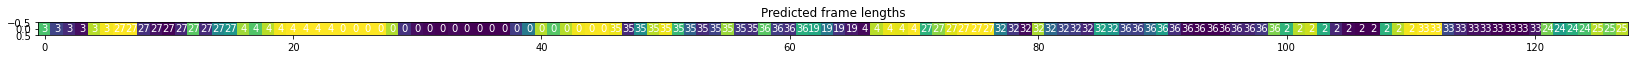

2: min 0.2689569592475891, max 0.7310572862625122
[(25, '0.49'), (25, '0.45'), (25, '0.48'), (25, '0.32'), (25, '0.28'), (25, '0.27'), (25, '0.33'), (25, '0.57'), (25, '0.35'), (30, '0.66'), (30, '0.63'), (30, '0.48'), (30, '0.68'), (30, '0.72'), (39, '0.73'), (39, '0.73'), (39, '0.73'), (39, '0.32'), (39, '0.28'), (39, '0.28'), (39, '0.52'), (39, '0.62'), (39, '0.51'), (39, '0.60'), (18, '0.39'), (18, '0.31'), (18, '0.28'), (18, '0.67'), (18, '0.41'), (18, '0.31'), (18, '0.28'), (18, '0.54'), (18, '0.63'), (18, '0.68'), (18, '0.63'), (18, '0.34'), (3, '0.30'), (3, '0.28'), (3, '0.27'), (3, '0.28'), (3, '0.28'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.63'), (5, '0.63'), (5, '0.51'), (5, '0.36'), (5, '0.28'), (5, '0.27'), (5, '0.27'), (5, '0.27'), (5, '0.27'), (5, '0.57'), (5, '0.56'), (5, '0.34'), (5, '0.30'), (5, '0.28'), (5, '0.27'), (5, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0,

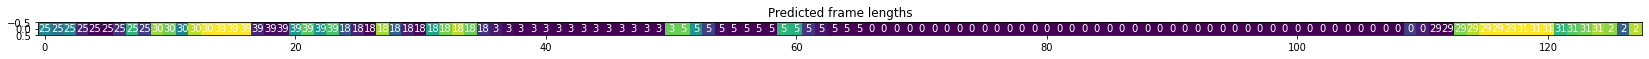

3: min 0.2689414322376251, max 0.7309843301773071
[(19, '0.61'), (35, '0.33'), (35, '0.28'), (35, '0.27'), (39, '0.27'), (39, '0.27'), (39, '0.27'), (39, '0.27'), (39, '0.27'), (39, '0.27'), (39, '0.36'), (39, '0.67'), (35, '0.71'), (35, '0.73'), (35, '0.73'), (35, '0.72'), (35, '0.36'), (35, '0.65'), (35, '0.47'), (35, '0.62'), (35, '0.33'), (36, '0.35'), (36, '0.55'), (36, '0.33'), (36, '0.65'), (36, '0.68'), (36, '0.72'), (19, '0.71'), (19, '0.59'), (19, '0.33'), (19, '0.29'), (19, '0.28'), (19, '0.27'), (19, '0.27'), (29, '0.30'), (29, '0.68'), (29, '0.72'), (31, '0.73'), (31, '0.73'), (31, '0.73'), (31, '0.73'), (31, '0.73'), (15, '0.73'), (15, '0.73'), (15, '0.32'), (15, '0.28'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.38'), (31, '0.67'), (31, '0.72'), (31, '0.73'), (31, '0.71'), (31, '0.73'), (31, '0.73'), (31, '0.67'), (31, '0.44'), (21, '0.64'), (21, '0.34'), (21, '0.28'

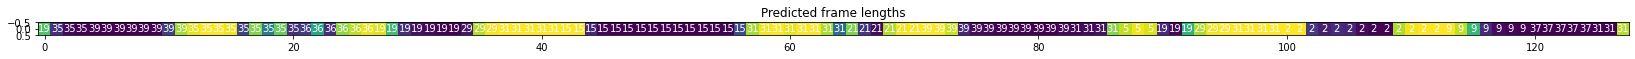

4: min 0.2689414322376251, max 0.7310584187507629
[(0, '0.35'), (0, '0.28'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.61'), (0, '0.33'), (0, '0.28'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (29, '0.27'), (29, '0.27'), (29, '0.67'), (29, '0.69'), (29, '0.72'), (29, '0.73'), (40, '0.73'), (40, '0.73'), (40, '0.33'), (40, '0.28'), (37, '0.65'), (37, '0.37'), (37, '0.35'), (37, '0.53'), (37, '0.61'), (37, '0.33'

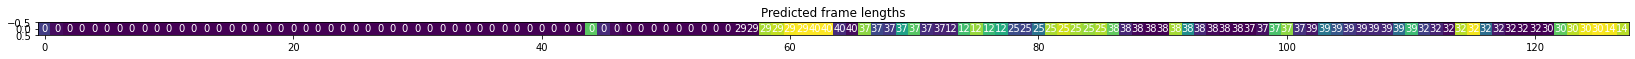

5: min 0.2689414322376251, max 0.7309558391571045
[(8, '0.65'), (8, '0.65'), (8, '0.41'), (8, '0.55'), (8, '0.33'), (25, '0.28'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.27'), (25, '0.37'), (24, '0.49'), (24, '0.58'), (24, '0.68'), (24, '0.69'), (24, '0.43'), (24, '0.37'), (8, '0.32'), (8, '0.29'), (8, '0.68'), (8, '0.72'), (31, '0.73'), (31, '0.73'), (31, '0.72'), (31, '0.49'), (31, '0.32'), (31, '0.40'), (31, '0.55'), (5, '0.58'), (5, '0.60'), (5, '0.49'), (5, '0.32'), (5, '0.30'), (5, '0.28'), (5, '0.27'), (5, '0.27'), (5, '0.27'), (19, '0.27'), (19, '0.27'), (19, '0.27'), (19, '0.27'), (19, '0.27'), (19, '0.27'), (12, '0.27'), (12, '0.27'), (12, '0.27'), (12, '0.27'), (12, '0.47'), (12, '0.62'), (12, '0.39'), (12, '0.42'), (12, '0.34'), (31, '0.47'), (31, '0.45'), (31, '0.60'), (

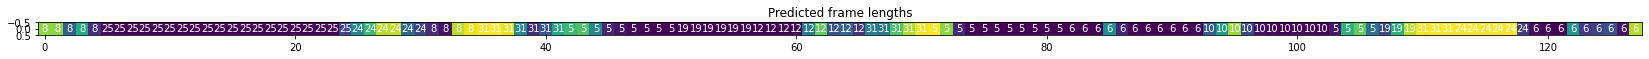

6: min 0.2689414322376251, max 0.7310584783554077
[(33, '0.57'), (33, '0.67'), (33, '0.70'), (33, '0.58'), (33, '0.51'), (2, '0.63'), (2, '0.51'), (2, '0.35'), (2, '0.28'), (2, '0.27'), (2, '0.27'), (2, '0.28'), (2, '0.66'), (2, '0.36'), (2, '0.32'), (2, '0.67'), (2, '0.56'), (30, '0.65'), (30, '0.58'), (30, '0.56'), (30, '0.67'), (10, '0.41'), (10, '0.61'), (10, '0.61'), (10, '0.45'), (10, '0.67'), (10, '0.64'), (10, '0.41'), (10, '0.62'), (10, '0.35'), (4, '0.63'), (4, '0.41'), (4, '0.56'), (4, '0.69'), (4, '0.70'), (4, '0.68'), (30, '0.32'), (30, '0.44'), (30, '0.68'), (30, '0.72'), (39, '0.72'), (39, '0.51'), (39, '0.66'), (39, '0.72'), (19, '0.73'), (19, '0.67'), (19, '0.34'), (19, '0.67'), (19, '0.71'), (19, '0.73'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (24, '0.73'), (24, '0.73'), (24, '0.73'), (24, '0.32'), (24, '0.28'), (24, '0.68'), (24, '0.72'), (40, '0.73'), (40, '0.72'), (40, '0.54'), (40, '0.37'), (30, '0.41'), (30, '0.40'), (30, '0.35'), (

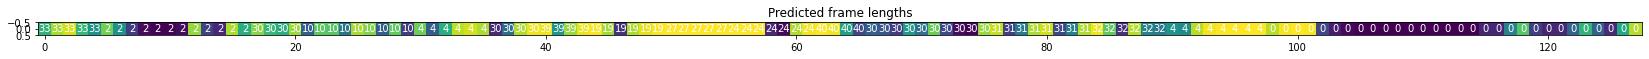

7: min 0.2689582109451294, max 0.7310581207275391
[(2, '0.66'), (2, '0.66'), (9, '0.70'), (9, '0.50'), (9, '0.46'), (9, '0.35'), (9, '0.29'), (9, '0.28'), (9, '0.27'), (9, '0.27'), (9, '0.27'), (9, '0.27'), (9, '0.27'), (9, '0.67'), (9, '0.70'), (28, '0.68'), (28, '0.37'), (28, '0.30'), (28, '0.27'), (28, '0.27'), (28, '0.68'), (28, '0.72'), (28, '0.73'), (28, '0.72'), (36, '0.37'), (36, '0.29'), (36, '0.27'), (36, '0.27'), (36, '0.27'), (36, '0.64'), (36, '0.66'), (36, '0.70'), (36, '0.62'), (38, '0.42'), (38, '0.57'), (38, '0.33'), (38, '0.40'), (38, '0.57'), (38, '0.65'), (38, '0.48'), (7, '0.40'), (7, '0.68'), (7, '0.72'), (7, '0.73'), (7, '0.67'), (3, '0.36'), (3, '0.30'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.30'), (3, '0.68'), (2, '0.72'), (2, '0.73'), (2, '0.73'), (2, '0.36'), (2, '0.31'), (2, '0.65'), (4, '0.72'), (4, '0.70'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (26, '0.73'), (26, '0.73'), (26, '0.47'), (26, '0.32'), (26, '0.28'), (37, '0.59'), (37, '0.38'), (37, '0

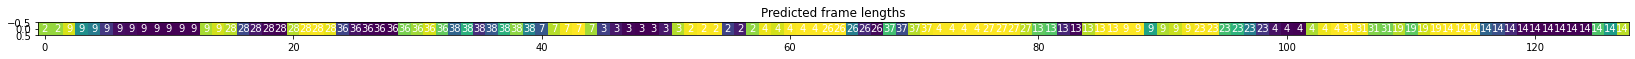

8: min 0.26894500851631165, max 0.7310559749603271
[(0, '0.35'), (0, '0.29'), (0, '0.28'), (0, '0.36'), (0, '0.34'), (0, '0.68'), (0, '0.71'), (0, '0.70'), (0, '0.42'), (0, '0.46'), (0, '0.42'), (11, '0.65'), (11, '0.34'), (11, '0.68'), (11, '0.72'), (11, '0.73'), (11, '0.73'), (11, '0.34'), (11, '0.29'), (11, '0.68'), (11, '0.72'), (39, '0.73'), (39, '0.73'), (39, '0.37'), (39, '0.31'), (39, '0.30'), (39, '0.31'), (39, '0.48'), (39, '0.32'), (39, '0.32'), (21, '0.59'), (21, '0.67'), (21, '0.72'), (21, '0.73'), (21, '0.73'), (21, '0.73'), (33, '0.73'), (33, '0.49'), (33, '0.33'), (33, '0.35'), (33, '0.66'), (33, '0.34'), (33, '0.28'), (33, '0.27'), (33, '0.27'), (33, '0.27'), (33, '0.28'), (33, '0.27'), (33, '0.27'), (33, '0.27'), (8, '0.30'), (8, '0.68'), (8, '0.70'), (8, '0.65'), (8, '0.42'), (8, '0.68'), (8, '0.72'), (8, '0.73'), (26, '0.73'), (26, '0.72'), (26, '0.60'), (26, '0.34'), (26, '0.30'), (26, '0.28'), (26, '0.27'), (26, '0.29'), (26, '0.58'), (26, '0.54'), (5, '0.43'), (5

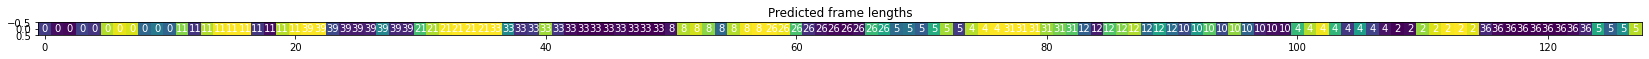

9: min 0.2690259516239166, max 0.7310261130332947
[(36, '0.50'), (36, '0.32'), (36, '0.51'), (36, '0.32'), (36, '0.28'), (36, '0.29'), (36, '0.68'), (36, '0.72'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (31, '0.73'), (31, '0.57'), (31, '0.70'), (31, '0.73'), (31, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.38'), (4, '0.29'), (4, '0.64'), (4, '0.34'), (4, '0.67'), (4, '0.71'), (4, '0.56'), (4, '0.64'), (3, '0.46'), (3, '0.62'), (3, '0.62'), (3, '0.32'), (3, '0.28'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (3, '0.27'), (19, '0.67'), (19, '0.70'), (19, '0.33'), (4, '0.28'), (4, '0.67'), (4, '0.72'), (4, '0.73'), (4, '0.73'), (27, '0.72'), (27, '0.33'), (27, '0.64'), (27, '0.68'), (27, '0.63'), (27, '0.59'), (27, '0.34'), (29, '0.67'), (29, '0.71'), (29, '0.73'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (2, '0.73'), (2, '0.73'), (2, '0.73'), (2, '0.42'), (2, '0.36'), (2, '0.32'), (2, '0.43'), (2, '0.65'), (2, '0.71'), (31, '0.73'), (31, '0.

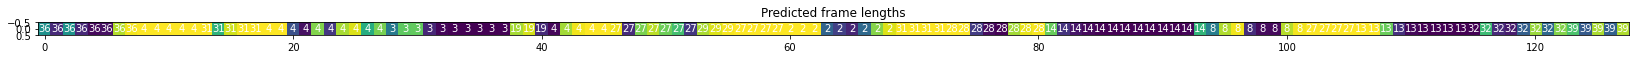

10: min 0.26895174384117126, max 0.7310582399368286
[(0, '0.34'), (0, '0.28'), (0, '0.28'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.55'), (0, '0.68'), (0, '0.72'), (0, '0.73'), (28, '0.73'), (28, '0.43'), (28, '0.55'), (28, '0.68'), (28, '0.72'), (28, '0.73'), (28, '0.68'), (28, '0.33'), (28, '0.28'), (28, '0.29'), (28, '0.29'), (28, '0.48'), (36, '0.53'), (36, '0.34'), (36, '0.29'), (36, '0.32'), (36, '0.29'), (36, '0.45'), (36, '0.68'), (36, '0.72'), (36, '0.72'), (38, '0.64'), (38, '0.39'), (38, '0.42'), (38, '0.48'), (38, '0.57'), (38, '0.45'), (7, '0.68'), (7, '0.72'), (7, '0.73'), (7, '0.73'), (3, '0.69'), (3, '0.68'), (3, '0.40'), (3, '0.61'), (3, '0.44'), (27, '0.51'), (27, '0.68'), (27, '0.72'), (27, '0

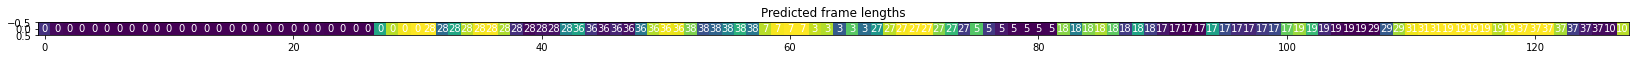

11: min 0.268942266702652, max 0.7310582399368286
[(7, '0.50'), (7, '0.45'), (7, '0.36'), (7, '0.29'), (7, '0.27'), (7, '0.55'), (7, '0.34'), (7, '0.66'), (7, '0.72'), (3, '0.73'), (3, '0.73'), (3, '0.73'), (3, '0.73'), (3, '0.73'), (28, '0.71'), (28, '0.32'), (28, '0.28'), (28, '0.27'), (28, '0.65'), (28, '0.67'), (39, '0.72'), (39, '0.72'), (39, '0.54'), (39, '0.34'), (39, '0.30'), (39, '0.68'), (4, '0.72'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (4, '0.73'), (26, '0.73'), (26, '0.73'), (26, '0.73'), (26, '0.34'), (26, '0.29'), (26, '0.42'), (5, '0.68'), (5, '0.72'), (5, '0.73'), (5, '0.51'), (5, '0.32'), (29, '0.68'), (29, '0.72'), (29, '0.73'), (31, '0.73'), (31, '0.73'), (31, '0.71'), (31, '0.36'), (31, '0.36'), (31, '0.34'), (37, '0.30'), (37, '0.28'), (37, '0.67'), (37, '0.72'), (37, '0.73'), (37, '0.63'), (37, '0.38'), (37, '0.66'), (33, '0.49'), (33, '0.33'), (33, '0.64'), (33, '0.34'), (33, '0.28'), (33, '0.27'), (33, '0.27'), (33, '0.27'), (33, '0.27'), (33, '0.

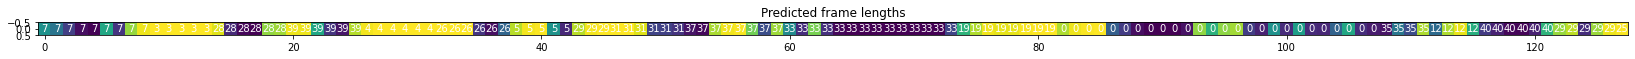

12: min 0.2689460515975952, max 0.7310584783554077
[(12, '0.61'), (12, '0.37'), (12, '0.62'), (12, '0.42'), (12, '0.33'), (9, '0.31'), (9, '0.28'), (9, '0.27'), (9, '0.27'), (9, '0.29'), (9, '0.30'), (37, '0.38'), (37, '0.41'), (37, '0.33'), (37, '0.31'), (37, '0.59'), (37, '0.68'), (5, '0.71'), (5, '0.68'), (5, '0.33'), (5, '0.67'), (5, '0.72'), (40, '0.73'), (40, '0.73'), (40, '0.68'), (40, '0.69'), (24, '0.72'), (24, '0.73'), (24, '0.73'), (24, '0.73'), (24, '0.65'), (24, '0.43'), (24, '0.67'), (25, '0.72'), (25, '0.73'), (25, '0.73'), (25, '0.73'), (25, '0.73'), (2, '0.73'), (2, '0.73'), (2, '0.73'), (2, '0.73'), (2, '0.54'), (2, '0.33'), (2, '0.59'), (2, '0.66'), (27, '0.72'), (27, '0.73'), (27, '0.73'), (27, '0.73'), (5, '0.72'), (5, '0.37'), (5, '0.32'), (5, '0.50'), (5, '0.67'), (5, '0.71'), (2, '0.70'), (2, '0.46'), (2, '0.68'), (35, '0.72'), (35, '0.72'), (35, '0.65'), (39, '0.63'), (39, '0.71'), (39, '0.73'), (12, '0.73'), (12, '0.73'), (12, '0.72'), (12, '0.73'), (31, '0.73

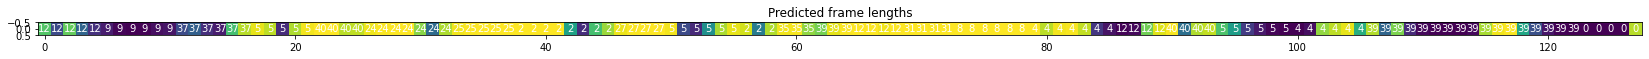

13: min 0.26894307136535645, max 0.7310585379600525
[(40, '0.46'), (40, '0.65'), (40, '0.71'), (5, '0.72'), (5, '0.73'), (5, '0.60'), (5, '0.68'), (35, '0.71'), (35, '0.64'), (35, '0.67'), (35, '0.55'), (35, '0.35'), (35, '0.55'), (39, '0.32'), (39, '0.28'), (39, '0.27'), (39, '0.54'), (39, '0.52'), (39, '0.61'), (39, '0.36'), (37, '0.55'), (37, '0.33'), (37, '0.34'), (37, '0.67'), (37, '0.71'), (37, '0.72'), (37, '0.73'), (37, '0.59'), (39, '0.33'), (39, '0.30'), (39, '0.35'), (39, '0.31'), (39, '0.59'), (39, '0.53'), (39, '0.38'), (16, '0.36'), (16, '0.59'), (16, '0.68'), (16, '0.71'), (16, '0.34'), (16, '0.30'), (16, '0.27'), (16, '0.27'), (4, '0.40'), (4, '0.48'), (4, '0.55'), (4, '0.33'), (4, '0.54'), (4, '0.32'), (4, '0.28'), (4, '0.27'), (4, '0.27'), (4, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (15, '0.27'), (37, '0.28'), (37, '0.52'), (37, '0.67'), (37, '0.68'), (37, '0.61'), (10, '0.39'), (10, '0.38'), (10, '0.56'), (10, '0.32'), (10, '0.28'), (10, '0.2

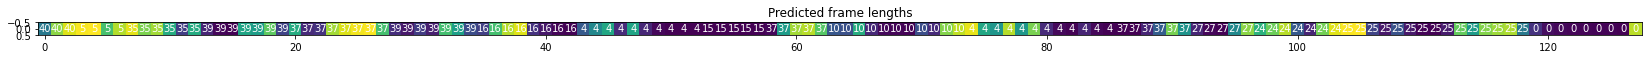

14: min 0.2689414322376251, max 0.7296611070632935
[(12, '0.41'), (12, '0.68'), (12, '0.72'), (12, '0.73'), (12, '0.73'), (27, '0.73'), (27, '0.64'), (27, '0.70'), (27, '0.72'), (5, '0.70'), (5, '0.33'), (5, '0.29'), (5, '0.27'), (5, '0.27'), (5, '0.27'), (5, '0.27'), (5, '0.28'), (2, '0.29'), (2, '0.37'), (2, '0.29'), (2, '0.31'), (2, '0.28'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.27'), (2, '0.56'), (2, '0.58'), (2, '0.56'), (39, '0.58'), (39, '0.68'), (39, '0.72'), (39, '0.72'), (39, '0.35'), (39, '0.29'), (39, '0.28'), (39, '0.45'), (39, '0.67'), (39, '0.54'), (39, '0.63'), (39, '0.37'), (39, '0.63'), (39, '0.69'), (39, '0.37'), (39, '0.34'), (0, '0.29'), (0, '0.67'), (0, '0.71'), (0, '0.71'), (0, '0.72'), (0, '0.69'), (0, '0.61'), (0, '0.36'), (0, '0.30'), (0, '0.30'), (0, '0.32'), (0, '0.28'), (0, '0.27'), (0, '0.28'), (0, '0.42'), (0, '0.32'), (0, '0.28'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), (0, '0.27'), 

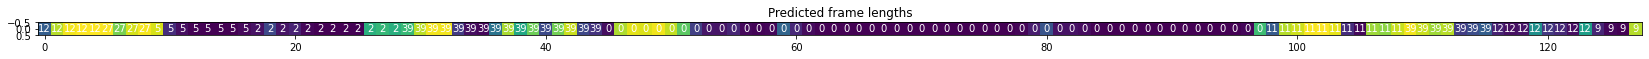

15: min 0.2689414322376251, max 0.7308326959609985
(16, 128) (16, 128)


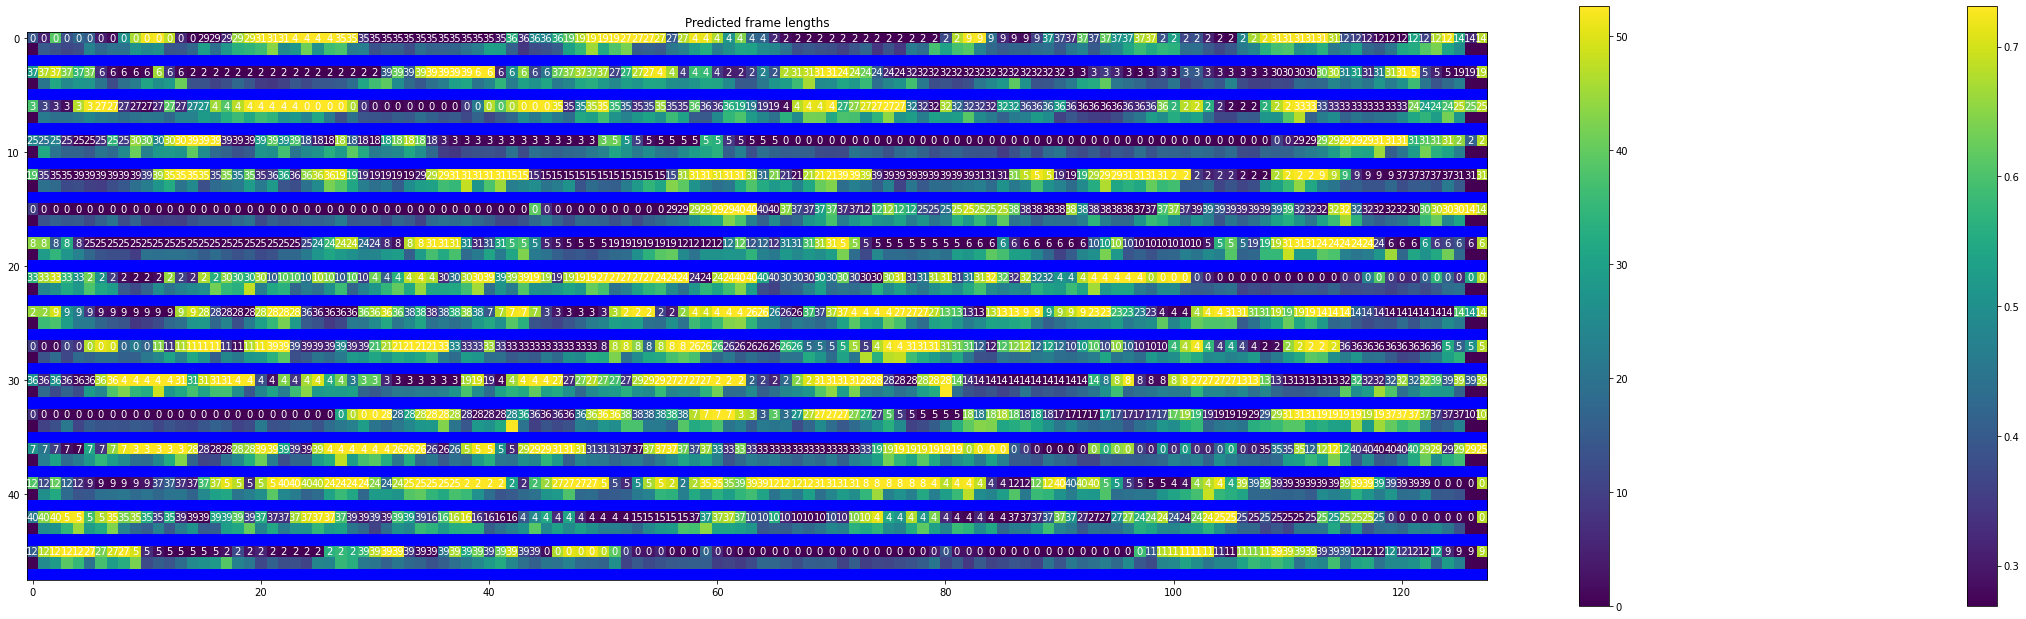

In [37]:

def f(tens):
    return tens.item()
def ff(tens):
    return "%.2f" % tens.item()

print(batchData.shape, c_feature.shape)
print(labelPhone[0,:20])
print(predLengths[0,:150])  #,-1])
print(torch.sigmoid(predLengths[0,:150])) #c_feature[0,:20,-1]))
lengths = torch.sigmoid(predLengths[:,:])  #c_feature[:,:200,-1])
for i in range(c_feature.shape[0]):
    print(list(zip(list(map(f, labelPhone[i,:])), list(map(ff,lengths[i])))))

    imgLabels = np.array(list(map(f, labelPhone[i,:])))[np.newaxis,:]
    imgColorData = np.array(lengths[i].cpu().detach())[np.newaxis,:]

    fig, ax = plt.subplots()
    im = ax.imshow(imgColorData)

    for j in range(len(imgColorData[0])):
        text = ax.text(j, 0, imgLabels[0,j],
                       ha="center", va="center", color="w")

    ax.set_title("Predicted frame lengths")
    fig.tight_layout()
    fig.set_size_inches(25.5, 4)
    plt.show()

    print(f"{i}: min {lengths[i].min().item()}, max {lengths[i].max().item()}")


imgLabels = np.array([list(map(f, labelPhone[i,:])) for i in range(lengths.shape[0])])
imgColorData = np.array(lengths.cpu().detach())
print(imgLabels.shape, imgColorData.shape)

features = encoded_data
fd0 = features[:,1:,:] - features[:,:-1,:]
frameDiffs = torch.sqrt(torch.clamp(fd0*fd0, min=0).sum(dim=-1))

from numpy.ma import masked_array

imgData = np.zeros((imgColorData.shape[0]*3, imgColorData.shape[1]))

imgData[::3] = -1000
#print(imgData[:,0])
imgData1 = masked_array(imgData,imgData>-999)
imgData[::3] = imgColorData
#print(imgData[:,0])

imgData[1::3] = -1000
#print(imgData[:,0])
imgData2 = masked_array(imgData,imgData>-999)
imgData[1::3, 1:-2] = frameDiffs[:,1:-1].detach().cpu().numpy()
imgData[1::3, -2:] = 0 
imgData[1::3, 0] = 0

imgData[2::3] = -1000
#print(imgData[:,0])
imgData3 = masked_array(imgData,imgData>-999)
imgData[2::3] = 0.

#print(imgData[:,1])

#print(imgData1[:,0])
#print(imgData2[:,0])
#print(imgData3[:,0])

from matplotlib import cm
fig, ax = plt.subplots()
im1 = ax.imshow(imgData1, interpolation='nearest', cmap=cm.viridis)
im2 = ax.imshow(imgData2, interpolation='nearest', cmap=cm.viridis)
im3 = ax.imshow(imgData3, interpolation='nearest', cmap=cm.winter)

for i in range(len(imgColorData)):
    for j in range(len(imgColorData[0])):
        text = ax.text(j, 3*i, imgLabels[i,j],
                        ha="center", va="center", color="w")

ax.set_title("Predicted frame lengths")
fig.tight_layout()
plt.colorbar(im1)
plt.colorbar(im2)
fig.set_size_inches(35.5, 9)
plt.show()

In [27]:
for p in range(40):
    print(p, list(map(ff, lengths[labelPhone==p])))

0 ['0.42', '0.35', '0.43', '0.34', '0.43', '0.46', '0.36', '0.55', '0.41', '0.64', '0.71', '0.72', '0.41', '0.32', '0.28', '0.69', '0.73', '0.73', '0.73', '0.73', '0.35', '0.30', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.66', '0.56', '0.63', '0.66', '0.68', '0.72', '0.73', '0.73', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.30', '0.28', '0.36', '0.29', '0.28', '0.28', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27', '0.27

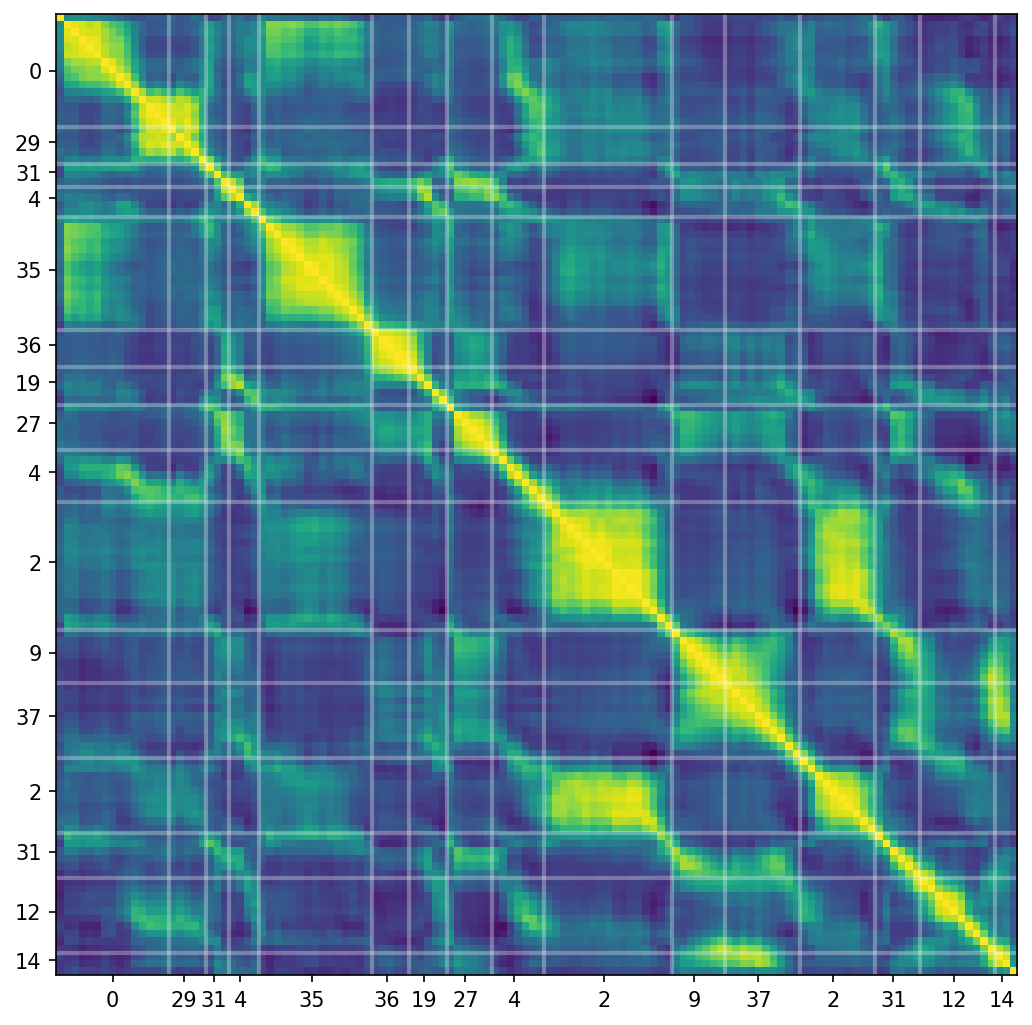

In [28]:

features = encoded_data  # c_feature

plt.figure(figsize=(7, 7), dpi=150)
phones = labelPhone[0,].cpu().numpy()  #label['phone'][0,].numpy()

enc = features[0, :, :].detach().cpu().numpy()
enc /= np.sqrt((enc**2).sum(1, keepdims=True))
sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(sims)
for boundary in np.where(np.diff(phones))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
#plt.colorbar()
plt.tight_layout()
# plt.axis('off')
bars = np.concatenate([[0], np.where(np.diff(phones))[0], [sims.shape[1]-1]])
phone_locs = (bars[:-1] + bars[1:]) / 2
_ = plt.xticks(phone_locs, [str(p) for p in phones[bars[1:]]])
_ = plt.yticks(phone_locs, [str(p) for p in phones[bars[1:]]])